# **Part 3 - Modelling:**

*Model selection should be based in "any" of the data mining tasks discussed, use Python to create your model.*

In [30]:
# Importing necessary libraries for modeling and visualization
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import silhouette_score

In [31]:
# Downloading my cleaned csv file to google colab
from google.colab import files
uploaded = files.upload()

Saving infections_list_cleaned.csv to infections_list_cleaned (1).csv


In [32]:
# ensuring file is uploaded to Colab
df = pd.read_csv("infections_list_cleaned.csv", encoding='latin1') #i used latin1 because it's exported from Power BI to Excel, so I used a Windows-based encoding, and not UTF-8
df.head()

,Infectious Agent,Common Name,Diagnosis,Treatment,VaccineStatus,Value,Attribute,Vaccine(s),Diagnosis Status,Treatment Status,Vaccine Status,Missing Count
0,Acinetobacter baumannii,Acinetobacterinfections,Culture,Supportive care,No Vaccine,Has Diagnosis,DiagnosisStatus,No,Has,Has,NaN,1
1,"Actinomyces israelii,Actinomyces gerencseriaea...",Actinomycosis,Histologic findings,"Penicillin,doxycycline, andsulfonamides",No Vaccine,Has Diagnosis,DiagnosisStatus,No,Has,Has,NaN,1
2,Adenoviridae,Adenovirus infection,"Antigendetection,polymerase chain reactionassa...",Most infections are mild and require no therap...,Under Research,Has Diagnosis,DiagnosisStatus,Under research,Has,Has,NaN,1
3,Alphavirus,Chikungunya,Laboratory criteria include adecreased lymphoc...,Supportive care,Under Research,Has Treatment,TreatmentStatus,Under research,Has,Has,NaN,1
4,Anaplasma phagocytophilum,Human granulocytic anaplasmosis(HGA),PCR,Doxycycline,No Vaccine,Has Treatment,TreatmentStatus,No,Has,Has,NaN,1


In [33]:
# Encoding categorical text data into numbers (for visualization)
encoder = LabelEncoder()

df['Diagnosis Status'] = encoder.fit_transform(df['Diagnosis Status'])  # ←  this converts text into integers
df['Treatment Status'] = encoder.fit_transform(df['Treatment Status'])
df['Vaccine Status'] = encoder.fit_transform(df['Vaccine Status'])

df_cluster = df[['Diagnosis Status', 'Treatment Status', 'Vaccine Status']] # ← preparing feature set for clustering

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


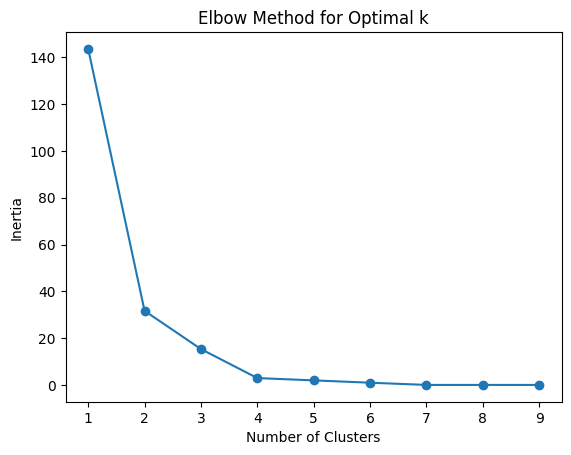

In [34]:
# using the elbow method to choose best k (find optimal number of clusters)
inertia = []  # ← this track WCSS for each cluster count
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [126]:
# Training the final KMeans model with chosen k (e.g. k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_cluster)

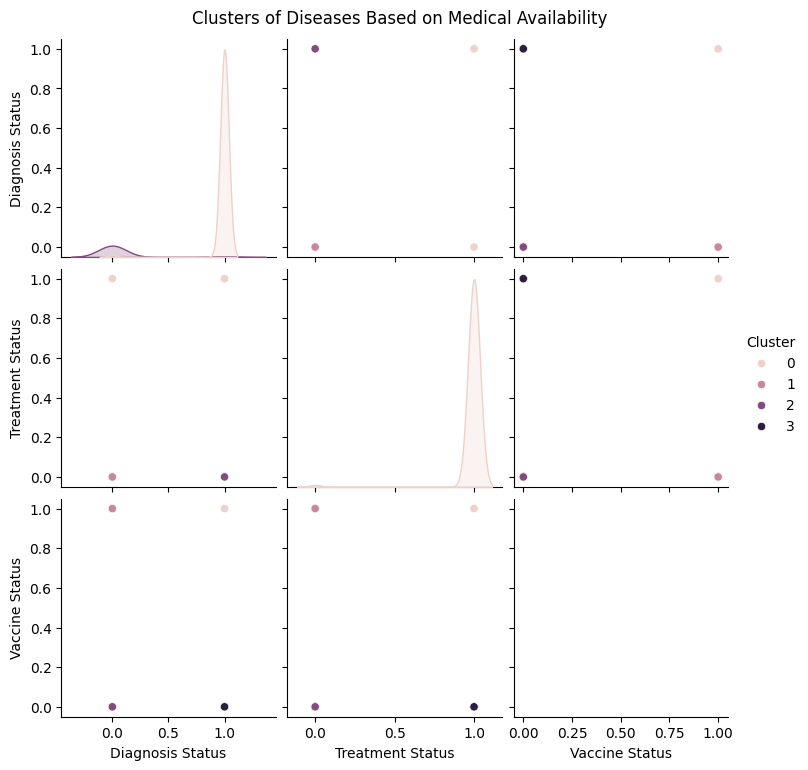

In [127]:
# Visualizing cluster separation using pairplot
sns.pairplot(df, hue='Cluster', vars=['Diagnosis Status', 'Treatment Status', 'Vaccine Status']) #seaborn as sns
plt.suptitle("Clusters of Diseases Based on Medical Availability", y=1.02)
plt.show()

In [128]:
# evaluate clustering using silhouette score (1.00 is the perfect accuracy)
score = silhouette_score(df_cluster, df['Cluster']) #sklearn.metrics import silhouette_score
print("Silhouette Score:", score)

Silhouette Score: 0.9739607788491703


In [131]:
df.groupby('Cluster')[['Diagnosis Status', 'Treatment Status', 'Vaccine Status']].mean() # < this is for part 4 so I can interpret each cluster accurately

,Diagnosis Status,Treatment Status,Vaccine Status
Cluster,,,
0,0.990741,0.990741,1.0
1,0.000000,0.000000,1.0
2,0.050000,0.000000,0.0
3,1.000000,1.000000,0.0
